# 1. Using all features

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('d:/data/Python2Kaggle/Titanic/titanic.txt')

In [3]:
titanic

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
5,6,1st,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male
6,7,1st,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female
7,8,1st,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male
8,9,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female
9,10,1st,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,(22),male


In [4]:
y = titanic['survived']
X = titanic.drop(['row.names', 'name', 'survived'], axis=1)

In [5]:
X['age'].fillna(X['age'].mean(), inplace=True)
X.fillna('UNKNOWN', inplace=True)

In [6]:
from sklearn.cross_validation import train_test_split

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 33)

In [8]:
from sklearn.feature_extraction import DictVectorizer

In [9]:
vec = DictVectorizer()

In [10]:
X_train = vec.fit_transform(X_train.to_dict(orient='record'))

In [11]:
X_test = vec.transform(X_test.to_dict(orient='record'))

In [12]:
print(len(vec.feature_names_))

474


In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt = DecisionTreeClassifier(criterion='entropy')

In [15]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
dt.score(X_test, y_test)

0.8206686930091185

# 2. Feature selection

In [17]:
from sklearn import feature_selection

In [18]:
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=20)

In [19]:
X_train_fs = fs.fit_transform(X_train, y_train)

In [20]:
dt.fit(X_train_fs, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
X_test_fs = fs.transform(X_test)

In [22]:
dt.score(X_test_fs, y_test)

0.8206686930091185

In [23]:
from sklearn.cross_validation import cross_val_score
import numpy as np

In [24]:
percentiles = range(1, 100, 2)

In [25]:
results = []

for i in percentiles:
  fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
  X_train_fs = fs.fit_transform(X_train, y_train)
  scores = cross_val_score(dt, X_train_fs, y_train, cv=5)
  results = np.append(results, scores.mean())
print(results)

[0.85063904 0.85673057 0.87501546 0.88622964 0.86791383 0.87101629
 0.87201608 0.86998557 0.86286333 0.86994434 0.86794475 0.86997526
 0.86794475 0.86490414 0.86284271 0.86793445 0.86283241 0.86993403
 0.86587302 0.85878169 0.86792414 0.86384251 0.86892393 0.86590394
 0.86896516 0.86487322 0.87302618 0.86995465 0.87200577 0.87198516
 0.86995465 0.86691404 0.86692435 0.86793445 0.86893424 0.86691404
 0.87097506 0.87606679 0.87402597 0.86793445 0.86791383 0.86385281
 0.86387343 0.86692435 0.86589363 0.86692435 0.86592455 0.86386312
 0.8577819  0.86387343]


In [26]:
opt = np.where(results == results.max())[0]
opt

array([3], dtype=int64)

In [27]:
print('Optimal number of feature is %d' %percentiles[opt[0]])
print('Optimal accuracy is', results[opt[0]])

Optimal number of feature is 7
Optimal accuracy is 0.8862296433725005


In [28]:
import pylab as pl

Text(0,0.5,'Accuracy')

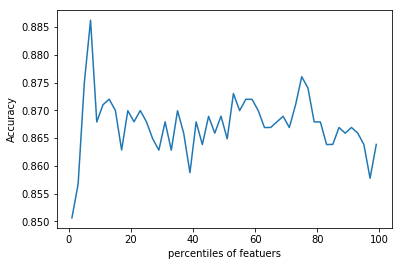

In [29]:
pl.plot(percentiles, results)
pl.xlabel('percentiles of featuers')
pl.ylabel('Accuracy')

In [30]:
fs_opt = feature_selection.SelectPercentile(feature_selection.chi2, percentile=7)

In [31]:
X_train_fs_opt = fs.fit_transform(X_train, y_train)

In [32]:
dt.fit(X_train_fs_opt, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
X_test_fs_opt = fs.transform(X_test)

In [34]:
dt.score(X_test_fs_opt, y_test)

0.8206686930091185